In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import re

In [2]:
# Descarga del DataFrame en archivo CSV. 

data_shark = pd.read_csv('/Users/JGR/IRON_HACK/Sharks/attacks.csv', encoding='UTF-8',encoding_errors='ignore')

# Enseña la cabeza del DataFrame
data_shark.head(2) 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0


In [3]:
data_shark.info() # Vemos toda la informacion de la Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

In [4]:
df = pd.DataFrame(data_shark)
null_counts = df.isna().sum() 
null_counts[null_counts > 0]  

Case Number               19519
Date                      19520
Year                      19522
Type                      19524
Country                   19566
Area                      19932
Location                  20031
Activity                  20055
Name                      19726
Sex                       20097
Age                       22240
Injury                    19548
Fatal (Y/N)               19550
Time                      22766
Species                   22514
Investigator or Source    19537
pdf                       19520
href formula              19521
href                      19521
Case Number.1             19520
Case Number.2             19520
original order            19520
dtype: int64

In [5]:
data_shark.shape, 

((25614, 22),)

In [6]:
df = data_shark.drop_duplicates() # Quitamos los duplicados y la guardamos en otra variable

In [7]:
df.shape

(6097, 22)

In [69]:
df = df.fillna('0') # Rellenamos todos los valores nulos a "0"
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Attack Date,Year,Month,Year Season
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,,Unknown
25613,xx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Unknown


In [9]:
df.shape

(6097, 22)

In [10]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [11]:
df = df.rename(columns={'Sex ': 'Sex'}) 

In [12]:
df = df.rename(columns={'Species ': 'Species'}) 

In [13]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [71]:
df.shape

(6097, 23)

In [16]:
df = df.rename(columns={'Case Number.1': 'Attack Date'})

In [17]:
df['Case Number.2'] = 0 # Limpieza de datos que me son irrelevantes

In [18]:
df['original order'] = 0  # Limpieza de datos que me son irrelevantes

In [19]:
df['href formula'] = 0  # Limpieza de datos que me son irrelevantes

In [20]:
df['href'] = 0  # Limpieza de datos que me son irrelevantes

In [21]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Attack Date,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",20170611,0,0,2017.06.11,0,0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,20170610,0,0,2017.06.10.b,0,0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",20170610,0,0,2017.06.10.a,0,0


In [22]:
# Porcentaje por Pais
Country_counts = df['Country'].value_counts()
Country_percentages = Country_counts / len(df) * 100
Percentages = Country_percentages.head(5)

<AxesSubplot:>

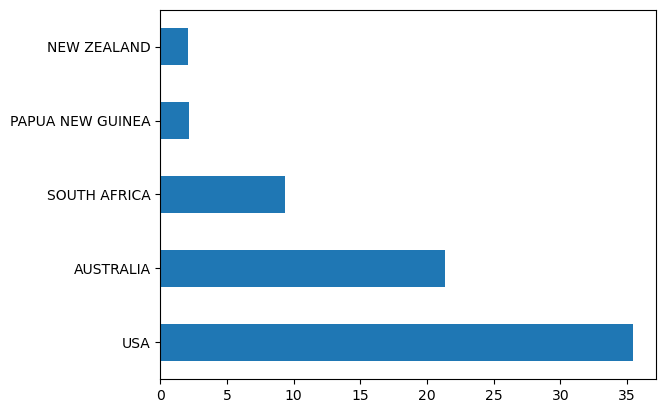

In [23]:
Percentages.plot.barh()

In [24]:
df.shape

(6097, 22)

In [25]:
# Porcentaje por Sexo
Sex_counts = df['Sex'].value_counts()
Sex_percentages = Sex_counts / len(df) * 100
S_percentage = Sex_percentages.head(2)

In [26]:
S_percentage

M    80.465803
F     9.939314
Name: Sex, dtype: float64

<AxesSubplot:>

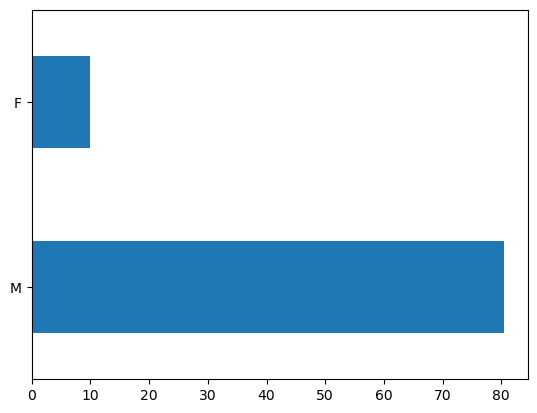

In [27]:
S_percentage.plot.barh()

In [28]:
injuries = df['Injury'].value_counts()
injurie = injuries.head(10)

In [29]:
injurie

FATAL                      746
Survived                    97
Foot bitten                 83
No injury                   79
Leg bitten                  71
Left foot bitten            49
No details                  43
Right foot bitten           39
0                           31
No injury, board bitten     30
Name: Injury, dtype: int64

<AxesSubplot:>

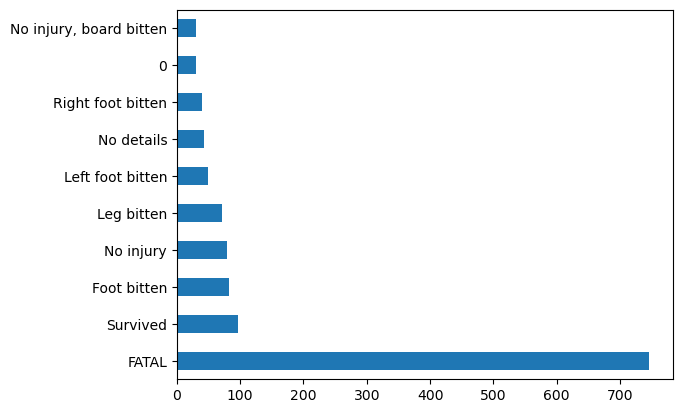

In [30]:
injurie.plot.barh()

In [31]:
time = df['Time'].value_counts()
time.head(10)

0            3249
Afternoon     181
11h00         126
Morning       112
12h00         108
15h00         101
16h00          98
14h00          95
16h30          73
13h00          72
Name: Time, dtype: int64

In [32]:
df.shape

(6097, 22)

In [74]:
sharks_species = df['Species'].value_counts()
sharks_species = sharks_species.head(4)
sharks_species

0                                  2997
White shark                         164
Shark involvement not confirmed      81
Tiger shark                          73
Name: Species, dtype: int64

In [34]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Attack Date,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",20170611,0,0,2017.06.11,0,0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,20170610,0,0,2017.06.10.b,0,0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",20170610,0,0,2017.06.10.a,0,0


In [35]:
Dates = df['Attack Date'].value_counts()
Dates.head(5)

0                 3
1920.00.00.b      2
1983.06.15        2
1915.07.06.a.R    2
2009.12.18        2
Name: Attack Date, dtype: int64

In [36]:
df = df.rename(columns={"Case Number.2": "Year"})

In [37]:
df = df.drop("original order", axis=1)

In [38]:
df["Attack Date"] = df["Attack Date"].str.slice(stop=10)  # Nos quedamos con los 10 primeros valores de la col. 

In [39]:
df.loc[df["Attack Date"].str.startswith("ND"), "Attack Date"] = "Unknown" + df["Attack Date"].str.slice(start=1)

In [77]:
df["Year"] = df["Attack Date"].str.slice(stop=4)

# Copiar los siguientes 2 dígitos de Attack Date a Month
df["Month"] = df["Attack Date"].str.slice(start=5, stop=7)

In [78]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",20170611,0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,20170610,0,0,2017.06.10,2017,06,Summer
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",20170610,0,0,2017.06.10,2017,06,Summer
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",20170607,0,0,2017.06.07,2017,06,Summer
4,2017.06.04,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",20170604,0,0,2017.06.04,2017,06,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,Unkn,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,Jules Patterson,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0002,0,0,Unknown,Unkn,wn,Unknown
6093,ND.0001,1845-1853,Unkn,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0001,0,0,Unknown,Unkn,wn,Unknown
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Unknown
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,,Unknown


In [42]:
month_report = df['Month'].value_counts()
month_report.head(12)

07    640
08    586
09    529
01    512
06    483
04    436
12    433
10    423
03    403
00    399
11    398
05    378
Name: Month, dtype: int64

In [43]:
for i in range(0, 13):
    # Convertimos el número a string y le añadimos un cero a la izquierda si es menor que 10
    str_num = str(i).zfill(2)
    # Reemplazamos los valores de la columna que sean iguales a i por str_num
    df['Month'] = df['Month'].replace(i, str_num)

In [62]:
df['Year Season'] = df['Month']

In [63]:
def get_season(month):
    if month in ['12', '01', '02']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Autumn'

# Aplicar la función al DataFrame y crear una nueva columna llamada 'estacion'
df['Year Season'] = df['Year Season'].apply(get_season)

In [64]:
seasons = df['Year Season'].value_counts()
seasons

Summer    1703
Autumn    1344
Winter    1312
Spring    1213
Name: Year Season, dtype: int64

<AxesSubplot:>

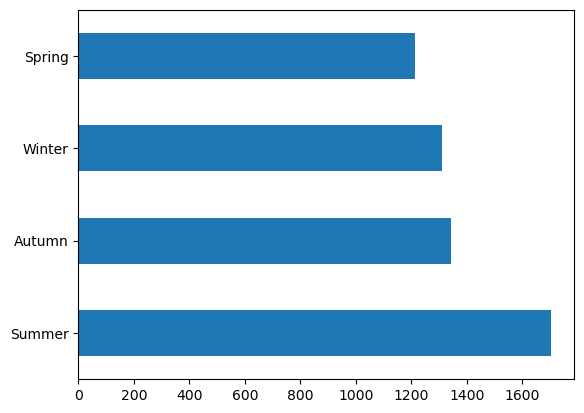

In [65]:
seasons.plot.barh()

In [76]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Attack Date,Year,Month,Year Season
0,2017.06.11,2017-06-11,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",20170611,0,0,2017.06.11,2017,06,Summer
1,2017.06.10.b,2017-06-10,2017,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,0,"No injury, knocke off board",N,15h45,7 gill shark,0,20170610,0,0,2017.06.10,2017,06,Summer
2,2017.06.10.a,2017-06-10,2017,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,0,"Daytona Beach News-Journal, 6/10/2017",20170610,0,0,2017.06.10,2017,06,Summer
3,2017.06.07.R,Reported 07-Jun-2017,2017,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,0,"3m shark, probably a smooth hound","C. Moore, GSAF",20170607,0,0,2017.06.07,2017,06,Summer
4,2017.06.04,2017-06-04,2017,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,0,Laceration to shin,N,0,8' shark,"Nine News, 6/7/2017",20170604,0,0,2017.06.04,2017,06,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,ND.0002,1883-1889,Unknown,Unprovoked,PANAMA,0,"Panama Bay 8N, 79W",0,Jules Patterson,M,0,FATAL,Y,0,0,"The Sun, 10/20/1938",0002,0,0,Unknown,Unknown,Unknown,Unknown
6093,ND.0001,1845-1853,Unknown,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,0,0,S.W. Baker,0001,0,0,Unknown,Unknown,Unknown,Unknown
6094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,Unknown
6101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,,Unknown


In [55]:
ataques = {}

# iterar sobre la columna de año
for y in df['Year']:
    # si el año no está en el diccionario, inicializarlo a 1
    if y not in ataques:
        ataques[y] = 1
    # si el año ya está en el diccionario, incrementar el contador
    else:
        ataques[y] += 1

# imprimir el resultado
for y, contador in ataques.items():
    print(f"Año: {y} - Número de ataques: {contador}")

Año: Year - Número de ataques: 2


In [75]:
fatalidades = df[df['Fatal (Y/N)'].str.contains('Y')]

# contar el número de veces que aparece la palabra 'fatal' en la columna 'Fatal (Y/N)'
contador = fatalidades['Fatal (Y/N)'].str.count('Y').sum()

# imprimir el resultado
print(f"En este registro podemos obtener la cantidad de: {contador} ataques 'Fatales'")

En este registro podemos obtener la cantidad de: 1566 ataques 'Fatales'


In [81]:
tipo_de_tib = df['Species'].value_counts()
tipo_top_10 = tipo_de_tib.head(4)
tipo_top_10

0                                  2997
White shark                         164
Shark involvement not confirmed      81
Tiger shark                          73
Name: Species, dtype: int64